In [115]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score,balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, brier_score_loss
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

# Google Drive'ı bağlayın
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TrendTopicModel/shopping_trends_updated.csv" , sep=",", encoding='utf-8')

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.shape

(3900, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   int64  
 3   Item Purchased          3900 non-null   int64  
 4   Category                3900 non-null   int64  
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   int64  
 7   Size                    3900 non-null   int64  
 8   Color                   3900 non-null   int64  
 9   Season                  3900 non-null   int64  
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   int64  
 13  Discount Applied        3900 non-null   int64  
 14  Promo Code Used         3900 non-null   

In [103]:
 df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,0.680000,12.035385,1.001795,59.764359,24.266410,1.120000,12.109487,1.492821,3.749949,0.270000,2.514359,0.430000,0.430000,25.351538,2.512308,2.974872
std,1125.977353,15.207589,0.466536,7.199162,0.896688,23.685392,14.343299,0.930496,7.221592,1.117236,0.716223,0.444016,1.697591,0.495139,0.495139,14.447125,1.690643,1.998559
min,1.000000,18.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,975.750000,31.000000,0.000000,6.000000,0.000000,39.000000,12.000000,0.000000,6.000000,0.750000,3.100000,0.000000,1.000000,0.000000,0.000000,13.000000,1.000000,1.000000
50%,1950.500000,44.000000,1.000000,12.000000,1.000000,60.000000,24.000000,1.000000,12.000000,1.000000,3.700000,0.000000,3.000000,0.000000,0.000000,25.000000,2.000000,3.000000
75%,2925.250000,57.000000,1.000000,18.000000,1.000000,81.000000,36.000000,2.000000,18.000000,2.000000,4.400000,1.000000,4.000000,1.000000,1.000000,38.000000,4.000000,5.000000
max,3900.000000,70.000000,1.000000,24.000000,3.000000,100.000000,49.000000,3.000000,24.000000,3.000000,5.000000,1.000000,5.000000,1.000000,1.000000,50.000000,5.000000,6.000000


In [ ]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [ ]:
df.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
#Convert all our columns into integer values using label_encoder and get the results

le = LabelEncoder()

col_list = []
for col in df.columns: #for loop to convert all non numeric values into numeric valus except target column
    if ((df[col].dtype == 'object') & (col != 'Subscription Status') ):
        col_list.append(col)

for i in col_list:
    df[i]=le.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   int64  
 3   Item Purchased          3900 non-null   int64  
 4   Category                3900 non-null   int64  
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   int64  
 7   Size                    3900 non-null   int64  
 8   Color                   3900 non-null   int64  
 9   Season                  3900 non-null   int64  
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   int64  
 12  Shipping Type           3900 non-null   int64  
 13  Discount Applied        3900 non-null   int64  
 14  Promo Code Used         3900 non-null   

In [ ]:
df['Subscription Status'] = np.where(df['Subscription Status']=='Yes',1,0)

In [ ]:
df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,9,1,28,45,0,21,2,4.2,0,0,0,0,32,5,6
3896,3897,52,0,0,0,49,14,0,23,1,4.5,0,5,0,0,41,0,1
3897,3898,46,0,1,0,33,29,0,8,1,2.9,0,4,0,0,24,5,5
3898,3899,44,0,17,2,77,22,2,3,2,3.8,0,1,0,0,24,5,6


In [ ]:
x = df[[ 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases']] #Independant variables
y = df['Subscription Status']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

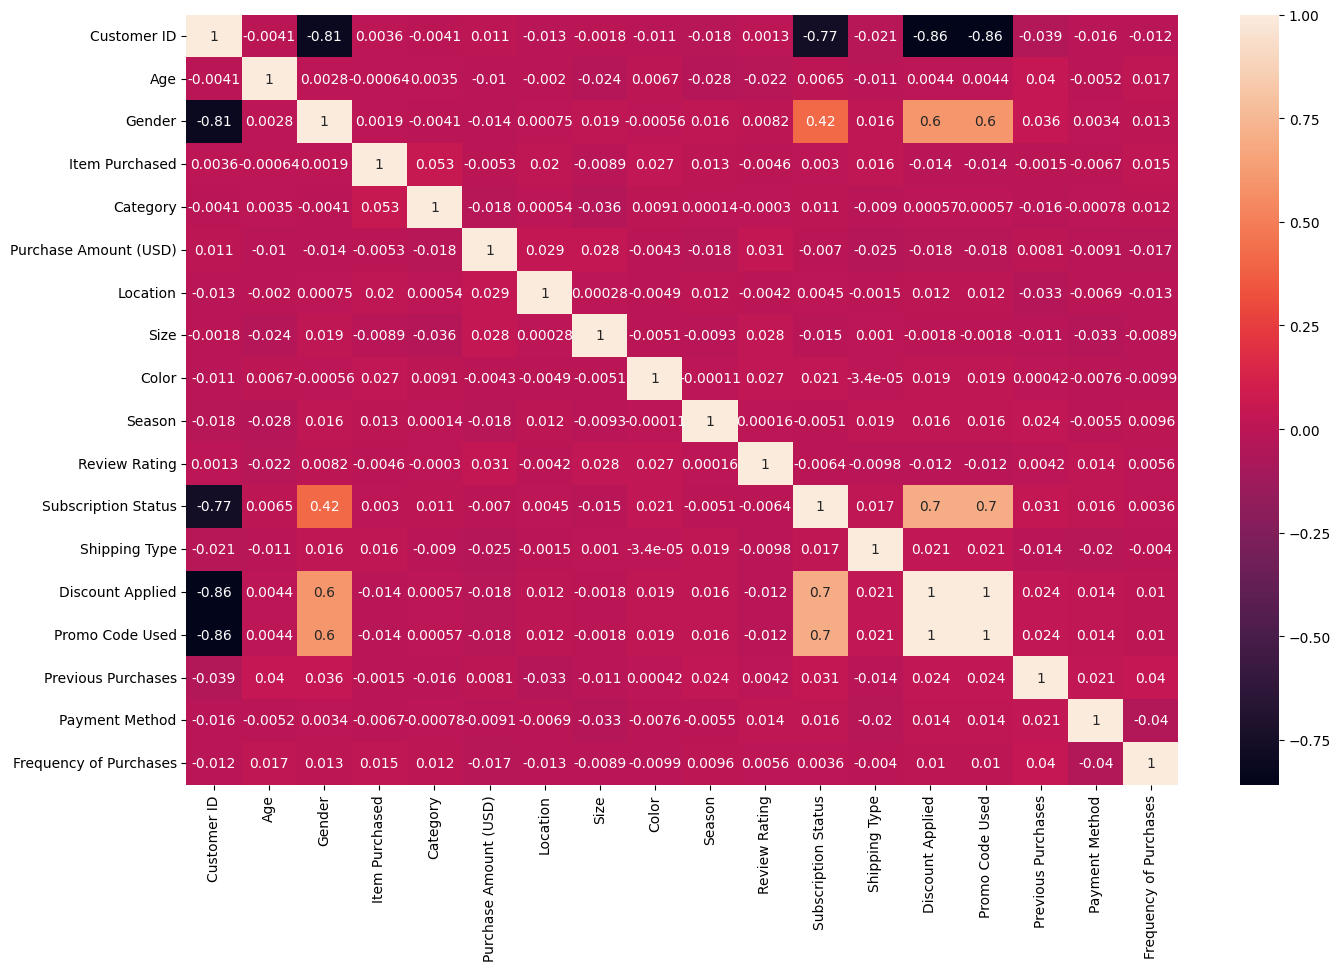

In [ ]:
plt.figure(figsize=(16,10)) #setting dimensions of the plot(16 is width, 10 is height)
ax = sns.heatmap(df.corr(numeric_only=True), annot=True) #calculates correlating matrix(of numerical cols).
plt.show()

In [ ]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
clf.score(x_test,y_test)

0.8128205128205128

In [ ]:
pred = clf.predict(x_test)

In [ ]:
report = classification_report(y_test,pred) #printing final report

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       558
           1       0.61      0.95      0.74       222

    accuracy                           0.81       780
   macro avg       0.79      0.85      0.80       780
weighted avg       0.87      0.81      0.82       780



In [ ]:
accuracy = accuracy_score(pred,y_test) #checking the accuracy
print(accuracy)

0.8128205128205128


In [ ]:
def train_evaluate_model(model, x_train, y_train, x_test,y_test):

    model.fit(x_train, y_train)  #model eğitme


    predictions = model.predict(x_test) # test üzerinden tahmin yapabilme

    #metrikler
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #sonuç çıktısı colums
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

**MODEL1**

In [87]:
  ##Logistic Regression

lg = LogisticRegression(penalty ="l2" ,C=0.5)

logisticRegressionResult = train_evaluate_model(lg, x_train, y_train, x_test, y_test)

logisticRegressionResult.index = ['LogisticRegression']

logisticRegressionResult.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.820513,0.749104,0.622024,0.941441,0.856921


**MODEL 2**

In [92]:
decision_tree = DecisionTreeClassifier(max_depth= 5,max_features=4)
decision_tree_results = train_evaluate_model(decision_tree,x_train, y_train, x_test, y_test)

decision_tree_results.index = ['DecisionTree']

decision_tree_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTree,0.816667,0.746903,0.615160,0.950450,0.856946


**MODEL 3**

In [96]:
xgboost = XGBClassifier()
xgboost_results = train_evaluate_model(xgboost, x_train, y_train, x_test, y_test)
xgboost_results.index = ['XGBoost']
xgboost_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
XGBoost,0.798718,0.684105,0.618182,0.765766,0.788797


**MODEL 4**

In [97]:
KNN = KNeighborsClassifier(n_neighbors=13,metric="minkowski")
knn_results = train_evaluate_model(KNN, x_train, y_train, x_test, y_test)
knn_results.index =['KNearsNeighbors']
knn_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.701282,0.071713,0.310345,0.040541,0.502349


**MODEL 5**

In [99]:
rfc = RandomForestClassifier(max_features=9, min_samples_split=4, n_estimators=91)
rfc_result = train_evaluate_model(rfc, x_train, y_train, x_test, y_test)
rfc_result.index = ['RandomForest']
rfc_result.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.815385,0.729323,0.625806,0.873874,0.832994


**MODEL 6 **

In [102]:
Naive_Bayes = GaussianNB()
Naive_Bayes_results = train_evaluate_model(Naive_Bayes, x_train, y_train, x_test, y_test)
Naive_Bayes_results.index = ['NaiveBayes']
Naive_Bayes_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
NaiveBayes,0.825641,0.765517,0.620112,1.000000,0.878136


**MODEL 6 Cross-Val TEST**

In [116]:
cv_results = cross_validate(Naive_Bayes, x, y, cv=5,
                            scoring={'precision': 'precision',
                                     'recall': 'recall',
                                     'f1': 'f1',
                                     'accuracy': 'accuracy',
                                     'roc_auc': 'roc_auc',
                                     'average_precision': 'average_precision',
                                     'neg_brier_score': 'neg_brier_score'})


cv_results_df = pd.DataFrame(cv_results)
cv_results_df.loc['Mean'] = cv_results_df.mean()
print(cv_results_df)

      fit_time  score_time  test_precision  test_recall   test_f1  \
0     0.005640    0.016468        0.270513          1.0  0.425832   
1     0.003776    0.010493        0.793233          1.0  0.884696   
2     0.003635    0.009402        1.000000          1.0  1.000000   
3     0.003482    0.009391        1.000000          1.0  1.000000   
4     0.003586    0.009752        1.000000          1.0  1.000000   
Mean  0.004024    0.011101        0.812749          1.0  0.862106   

      test_accuracy  test_roc_auc  test_average_precision  \
0          0.270513      0.500000                0.270513   
1          0.929487      0.942020                0.765720   
2          1.000000      1.000000                1.000000   
3          1.000000      1.000000                1.000000   
4          1.000000      1.000000                1.000000   
Mean       0.840000      0.888404                0.807247   

      test_neg_brier_score  
0            -7.294872e-01  
1            -7.051282e-02  
2

**MODEL 5 RFC (RANDOM FOREST) TEST Cross-Validation**

In [117]:
cv_results = cross_validate(rfc, x, y, cv=5,
                            scoring={'precision': 'precision',
                                     'recall': 'recall',
                                     'f1': 'f1',
                                     'accuracy': 'accuracy',
                                     'roc_auc': 'roc_auc',
                                     'average_precision': 'average_precision',
                                     'neg_brier_score': 'neg_brier_score'})


cv_results_df = pd.DataFrame(cv_results)
cv_results_df.loc['Mean'] = cv_results_df.mean()
print(cv_results_df)

      fit_time  score_time  test_precision  test_recall   test_f1  \
0     0.306501    0.030308        0.270513     1.000000  0.425832   
1     0.408357    0.028355        0.788991     0.815166  0.801865   
2     0.427101    0.028496        1.000000     0.767773  0.868633   
3     0.447919    0.027411        1.000000     0.804762  0.891821   
4     0.442691    0.030096        1.000000     0.671429  0.803419   
Mean  0.406514    0.028933        0.811901     0.811826  0.758314   

      test_accuracy  test_roc_auc  test_average_precision  \
0          0.270513      0.519811                0.290130   
1          0.891026      0.951511                0.808732   
2          0.937179      1.000000                1.000000   
3          0.947436      1.000000                1.000000   
4          0.911538      1.000000                1.000000   
Mean       0.791538      0.894264                0.819772   

      test_neg_brier_score  
0                -0.622087  
1                -0.073863  
2

MODEL 4 CNN Cross-Validation-Test

In [118]:
cv_results = cross_validate(KNN, x, y, cv=5,
                            scoring={'precision': 'precision',
                                     'recall': 'recall',
                                     'f1': 'f1',
                                     'accuracy': 'accuracy',
                                     'roc_auc': 'roc_auc',
                                     'average_precision': 'average_precision',
                                     'neg_brier_score': 'neg_brier_score'})


cv_results_df = pd.DataFrame(cv_results)
cv_results_df.loc['Mean'] = cv_results_df.mean()
print(cv_results_df)

      fit_time  score_time  test_precision  test_recall   test_f1  \
0     0.005013    0.093786        0.222222     0.028436  0.050420   
1     0.003575    0.336642        0.342857     0.056872  0.097561   
2     0.005821    0.143639        0.368421     0.033175  0.060870   
3     0.004891    0.408939        0.233333     0.033333  0.058333   
4     0.006548    0.527085        0.550000     0.052381  0.095652   
Mean  0.005170    0.302018        0.343367     0.040840  0.072567   

      test_accuracy  test_roc_auc  test_average_precision  \
0          0.710256      0.515118                0.275237   
1          0.715385      0.515213                0.283733   
2          0.723077      0.541542                0.291434   
3          0.710256      0.530430                0.287776   
4          0.733333      0.536132                0.312972   
Mean       0.718462      0.527687                0.290230   

      test_neg_brier_score  
0                -0.210674  
1                -0.209596  
2

MODEL 3 Xgboost-Cross-validation-Test

In [123]:
cv_results = cross_validate(xgboost, x, y, cv=5,
                            scoring={'precision': 'precision',
                                     'recall': 'recall',
                                     'f1': 'f1',
                                     'accuracy': 'accuracy',
                                     'roc_auc': 'roc_auc',
                                     'average_precision': 'average_precision',
                                     'neg_brier_score': 'neg_brier_score'})


cv_results_df = pd.DataFrame(cv_results)
cv_results_df.loc['Mean'] = cv_results_df.mean()
print(cv_results_df)

      fit_time  score_time  test_precision  test_recall   test_f1  \
0     0.053611    0.016918        0.270619     0.995261  0.425532   
1     0.065118    0.016762        0.804469     0.682464  0.738462   
2     0.068986    0.017058        1.000000     0.658768  0.794286   
3     0.064260    0.015960        1.000000     0.661905  0.796562   
4     0.061901    0.018680        1.000000     0.576190  0.731118   
Mean  0.062775    0.017076        0.815018     0.714918  0.697192   

      test_accuracy  test_roc_auc  test_average_precision  \
0          0.273077      0.511161                0.288766   
1          0.869231      0.955372                0.817533   
2          0.907692      1.000000                1.000000   
3          0.908974      1.000000                1.000000   
4          0.885897      1.000000                1.000000   
Mean       0.768974      0.893307                0.821260   

      test_neg_brier_score  
0                -0.698548  
1                -0.087185  
2

MODEL 2 DeciTree-Cross-validation-Test

In [124]:
cv_results = cross_validate(decision_tree, x, y, cv=5,
                            scoring={'precision': 'precision',
                                     'recall': 'recall',
                                     'f1': 'f1',
                                     'accuracy': 'accuracy',
                                     'roc_auc': 'roc_auc',
                                     'average_precision': 'average_precision',
                                     'neg_brier_score': 'neg_brier_score'})


cv_results_df = pd.DataFrame(cv_results)
cv_results_df.loc['Mean'] = cv_results_df.mean()
print(cv_results_df)

      fit_time  score_time  test_precision  test_recall   test_f1  \
0     0.017417    0.019573        0.272610     1.000000  0.428426   
1     0.006966    0.013762        0.798354     0.919431  0.854626   
2     0.005484    0.029935        1.000000     0.881517  0.937028   
3     0.012382    0.067583        1.000000     0.900000  0.947368   
4     0.006598    0.013190        1.000000     0.857143  0.923077   
Mean  0.009769    0.028809        0.814193     0.911618  0.818105   

      test_accuracy  test_roc_auc  test_average_precision  \
0          0.278205      0.491342                0.269806   
1          0.915385      0.952752                0.811473   
2          0.967949      1.000000                1.000000   
3          0.973077      0.997619                0.996520   
4          0.961538      1.000000                1.000000   
Mean       0.819231      0.888343                0.815560   

      test_neg_brier_score  
0                -0.642959  
1                -0.070160  
2

MODEL 1 LOGREG-Cross-Validation-Test

In [126]:
cv_results = cross_validate(lg, x, y, cv=5,
                            scoring={'precision': 'precision',
                                     'recall': 'recall',
                                     'f1': 'f1',
                                     'accuracy': 'accuracy',
                                     'roc_auc': 'roc_auc',
                                     'average_precision': 'average_precision',
                                     'neg_brier_score': 'neg_brier_score'})


cv_results_df = pd.DataFrame(cv_results)
cv_results_df.loc['Mean'] = cv_results_df.mean()
print(cv_results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

      fit_time  score_time  test_precision  test_recall   test_f1  \
0     0.029443    0.014973        0.270513     1.000000  0.425832   
1     0.034523    0.015440        0.789474     0.853081  0.820046   
2     0.030897    0.014411        1.000000     0.706161  0.827778   
3     0.031320    0.014725        1.000000     0.757143  0.861789   
4     0.031405    0.018840        1.000000     0.671429  0.803419   
Mean  0.031518    0.015678        0.811997     0.797563  0.747773   

      test_accuracy  test_roc_auc  test_average_precision  \
0          0.270513      0.472992                0.260174   
1          0.898718      0.950491                0.788673   
2          0.920513      1.000000                1.000000   
3          0.934615      1.000000                1.000000   
4          0.911538      1.000000                1.000000   
Mean       0.787179      0.884697                0.809769   

      test_neg_brier_score  
0                -0.634491  
1                -0.072416  
2